In [29]:
%pylab inline
import pandas as pd
import requests
import json
from numpy import nan as NA
consumerData = pd.read_json('https://data.consumerfinance.gov/resource/jhzv-w97w.json')

Populating the interactive namespace from numpy and matplotlib


In [30]:
consumerData

,company,company_public_response,company_response,complaint_id,complaint_what_happened,consumer_consent_provided,consumer_disputed,date_received,date_sent_to_company,issue,product,state,sub_issue,sub_product,submitted_via,tags,timely,zip_code
0,"RevCrest, Inc.",Company believes it acted appropriately as aut...,Closed with explanation,2556983,NaN,Consent not provided,N/A,2017-06-23T00:00:00.000,2017-06-23T00:00:00.000,Attempts to collect debt not owed,Debt collection,CA,Debt is not yours,Federal student loan debt,Web,NaN,Yes,90094
1,"Alpine Credit, Inc",Company disputes the facts presented in the co...,Closed with explanation,2383241,I have not been contacted about this negative ...,Consent provided,No,2017-03-13T00:00:00.000,2017-03-15T00:00:00.000,Cont'd attempts collect debt not owed,Debt collection,AR,Debt was paid,I do not know,Web,NaN,No,729XX
2,OCWEN LOAN SERVICING LLC,Company has responded to the consumer and the ...,Closed with explanation,2532647,NaN,Consent not provided,N/A,2017-06-17T00:00:00.000,2017-06-17T00:00:00.000,Trouble during payment process,Mortgage,MD,NaN,Conventional home mortgage,Web,NaN,Yes,21717
3,Ditech Financial LLC,Company believes it acted appropriately as aut...,Closed with explanation,2371574,NaN,Consent not provided,No,2017-03-04T00:00:00.000,2017-03-04T00:00:00.000,"Loan servicing, payments, escrow account",Mortgage,MI,NaN,Conventional fixed mortgage,Web,NaN,Yes,48328
4,JPMORGAN CHASE & CO.,NaN,Closed with monetary relief,2432049,NaN,N/A,No,2017-04-12T00:00:00.000,2017-04-13T00:00:00.000,Deposits and withdrawals,Bank account or service,CA,NaN,Other bank product/service,Referral,NaN,Yes,91913
5,"TRANSUNION INTERMEDIATE HOLDINGS, INC.",Company has responded to the consumer and the ...,Closed with explanation,2556286,NaN,Consent not provided,N/A,2017-06-22T00:00:00.000,2017-06-22T00:00:00.000,Improper use of your report,"Credit reporting, credit repair services, or o...",TX,Credit inquiries on your report that you don't...,Credit reporting,Web,NaN,Yes,75165
6,Alliance Data Card Services,NaN,Closed with explanation,2560301,NaN,NaN,N/A,2017-06-27T00:00:00.000,2017-06-27T00:00:00.000,"Advertising and marketing, including promotion...",Credit card or prepaid card,GA,Confusing or misleading advertising about the ...,Store credit card,Web,NaN,Yes,303XX
7,"BANK OF AMERICA, NATIONAL ASSOCIATION",Company has responded to the consumer and the ...,Closed with explanation,2416625,NaN,N/A,No,2017-04-03T00:00:00.000,2017-04-04T00:00:00.000,Deposits and withdrawals,Bank account or service,WA,NaN,Checking account,Referral,NaN,Yes,98052
8,BARCLAYS BANK DELAWARE,Company has responded to the consumer and the ...,Closed with explanation,2423410,NaN,Consent not provided,No,2017-04-06T00:00:00.000,2017-04-06T00:00:00.000,Other fee,Credit card,VA,NaN,NaN,Web,Servicemember,Yes,22315
9,"TRANSUNION INTERMEDIATE HOLDINGS, INC.",Company has responded to the consumer and the ...,Closed with explanation,2475212,NaN,Other,N/A,2017-05-04T00:00:00.000,2017-05-16T00:00:00.000,Incorrect information on your report,"Credit reporting, credit repair services, or o...",IL,Old information reappears or never goes away,Credit reporting,Web,Servicemember,Yes,606XX


In [31]:
companyData = consumerData['company'].dropna()

In [32]:
companyCount = companyData.value_counts()

In [33]:
companyCount.head()

TRANSUNION INTERMEDIATE HOLDINGS, INC.    111
BANK OF AMERICA, NATIONAL ASSOCIATION     102
EQUIFAX, INC.                              55
JPMORGAN CHASE & CO.                       46
WELLS FARGO & COMPANY                      39
Name: company, dtype: int64

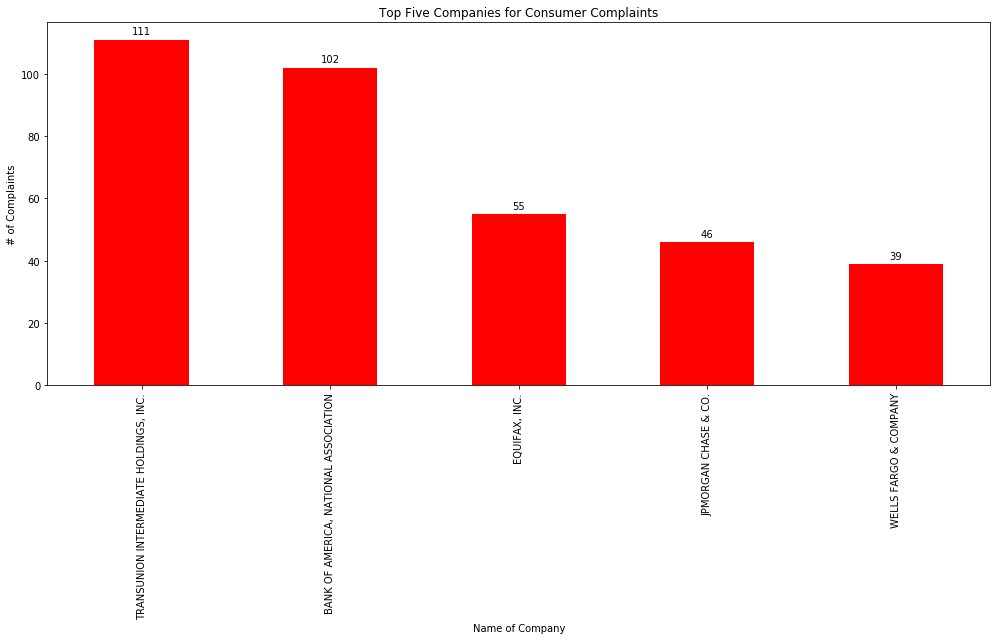

In [34]:
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 14
fig_size[1] = 9
plt.rcParams["figure.figsize"] = fig_size
ax = companyCount.head().plot.bar(color='red')
rects = ax.patches
labels = [companyCount[i] for i in range(len(rects))]
for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2, height + 1, label, ha='center', va='bottom')
ax.set_title('Top Five Companies for Consumer Complaints')
ax.set_ylabel("# of Complaints")
ax.set_xlabel("Name of Company")
plt.tight_layout()
#savefig('Top5CompanyComplaints.pdf')

In [35]:
companyPublicResponseData = consumerData['company_public_response'].dropna()

In [36]:
companyResponseCounts = companyPublicResponseData.value_counts()

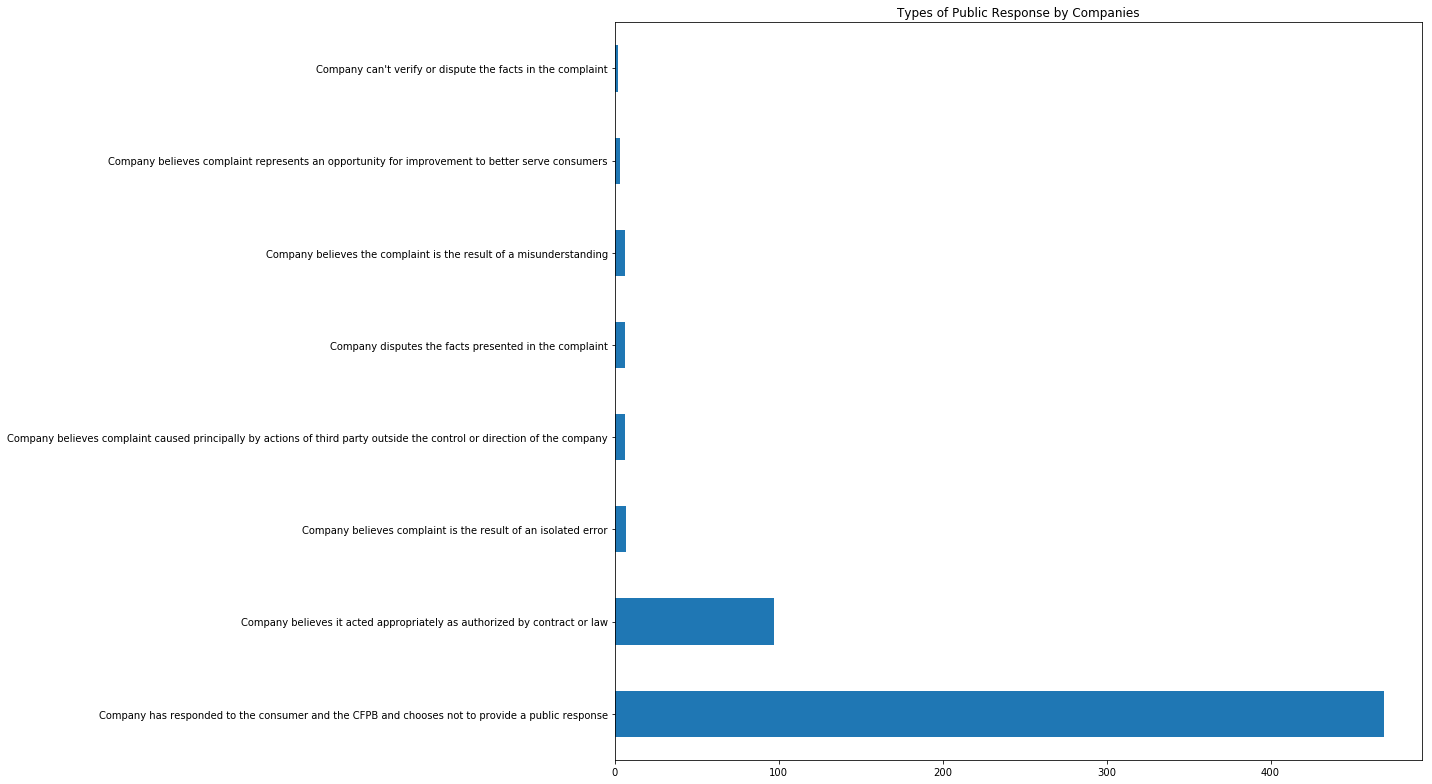

In [37]:
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 20
fig_size[1] = 11
plt.rcParams["figure.figsize"] = fig_size
ax = companyResponseCounts.plot.barh()
rects = ax.patches
labels = [companyResponseCounts[i] for i in range(len(rects))]
ax.set_title("Types of Public Response by Companies")
plt.tight_layout()
#savefig('TypesofPublicResponsebyCompanies.pdf')

In [38]:
stateData = consumerData['state'].dropna()

In [39]:
stateCount = stateData.value_counts()

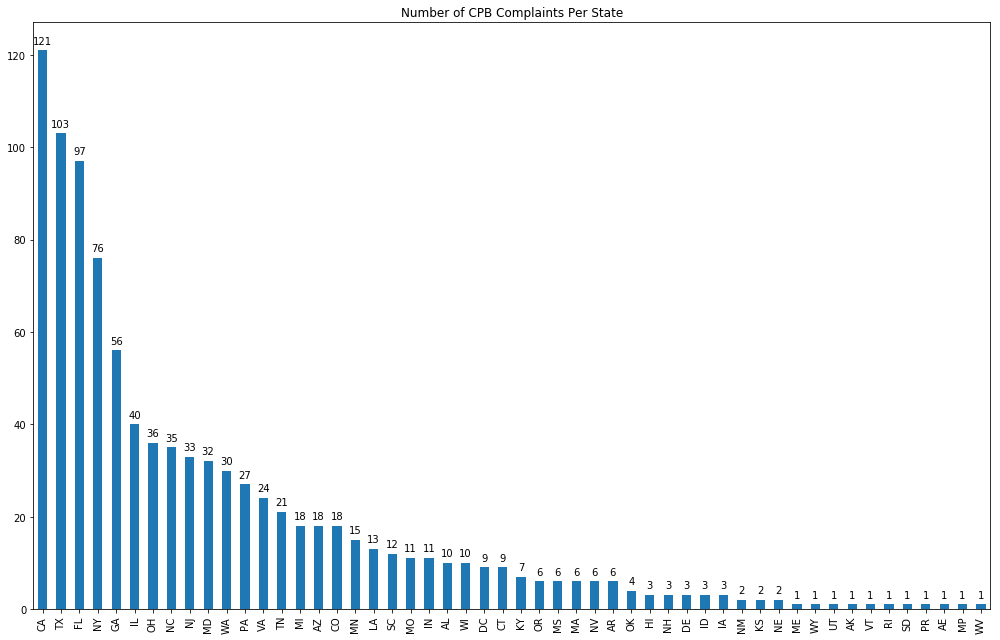

In [40]:
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 14
fig_size[1] = 9
plt.rcParams["figure.figsize"] = fig_size
ax = stateCount.plot.bar()
rects = ax.patches
labels = [stateCount[i] for i in range(len(rects))]
for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2, height + 1, label, ha='center', va='bottom')
ax.set_title("Number of CPB Complaints Per State")
plt.tight_layout()
#savefig('NumberofComplaintsPerState.pdf')

In [41]:
productData = consumerData['product'].dropna()

In [42]:
productCount = productData.value_counts()

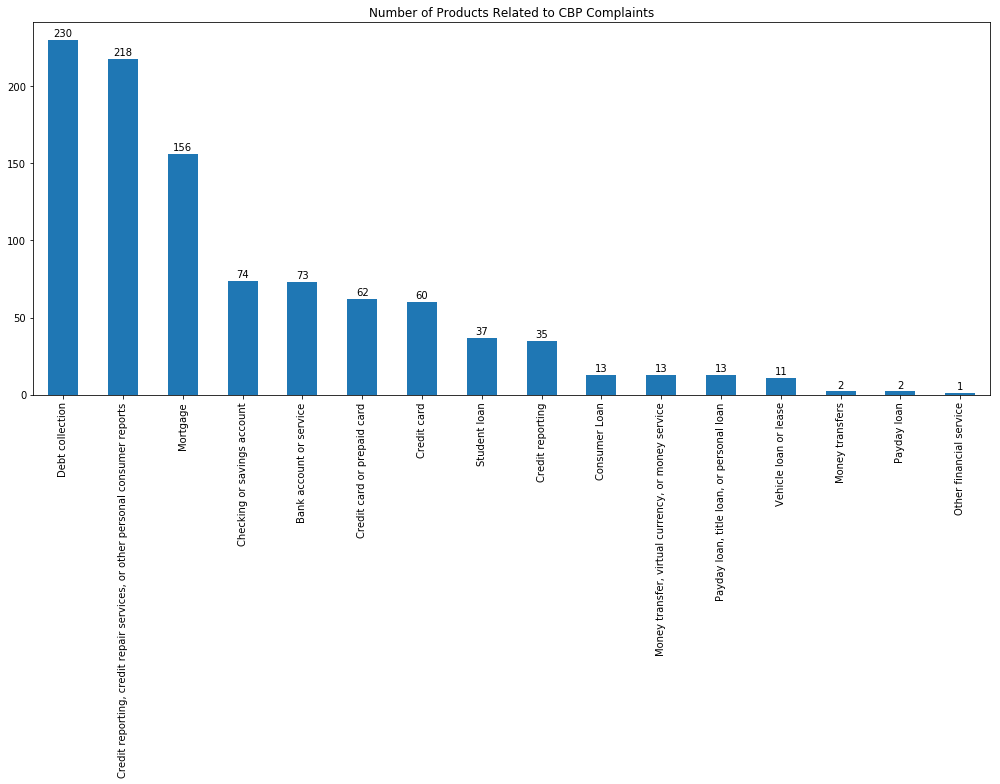

In [43]:
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 14
fig_size[1] = 11
plt.rcParams["figure.figsize"] = fig_size
ax = productCount.plot.bar()
rects = ax.patches
labels = [productCount[i] for i in range(len(rects))]
for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2, height + 1, label, ha='center', va='bottom')
ax.set_title("Number of Products Related to CBP Complaints")
plt.tight_layout()
#savefig('TypesofProductPerCBPComplaint.pdf')

In [44]:
productsPerState = consumerData.groupby('state')['product'].apply(lambda x: x.sum())

In [45]:
b = productsPerState.str.count("Debt collection")

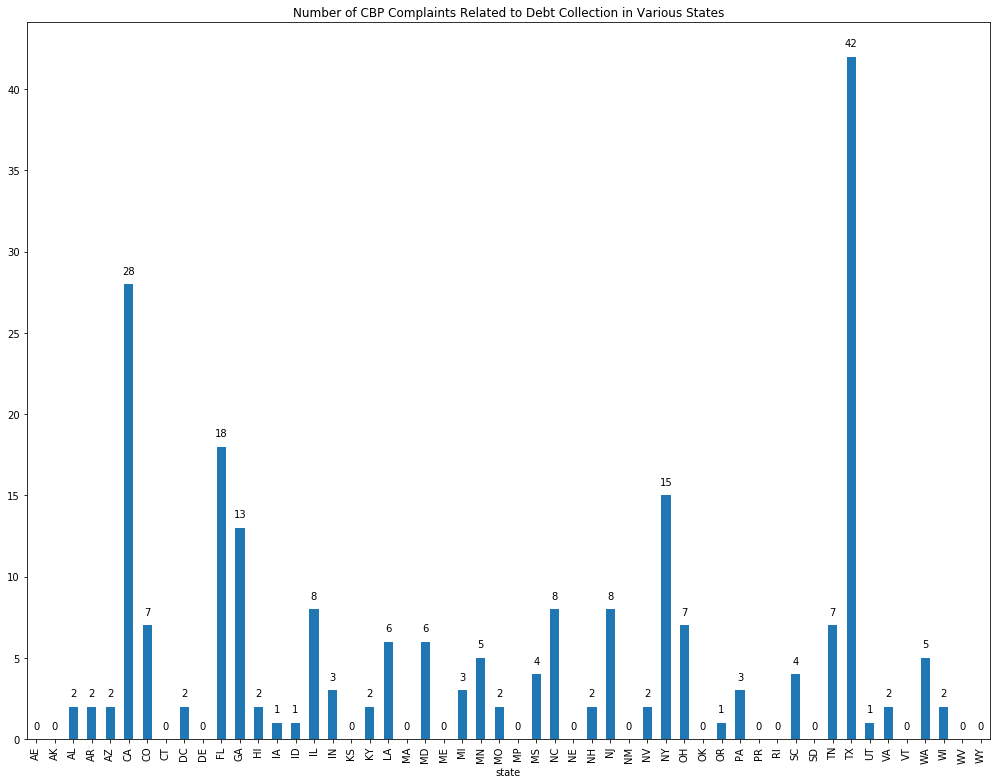

In [46]:
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 14
fig_size[1] = 11
plt.rcParams["figure.figsize"] = fig_size
ax = b.plot.bar()
rects = ax.patches
labels = [b[i] for i in range(len(rects))]
for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2, height + 0.5, label, ha='center', va='bottom')
ax.set_title("Number of CBP Complaints Related to Debt Collection in Various States")
plt.tight_layout()
#savefig('ComplaintsRelatedToDebtCollectionInVariousStates.pdf')

In [47]:
c = productsPerState.str.count("Mortgage")

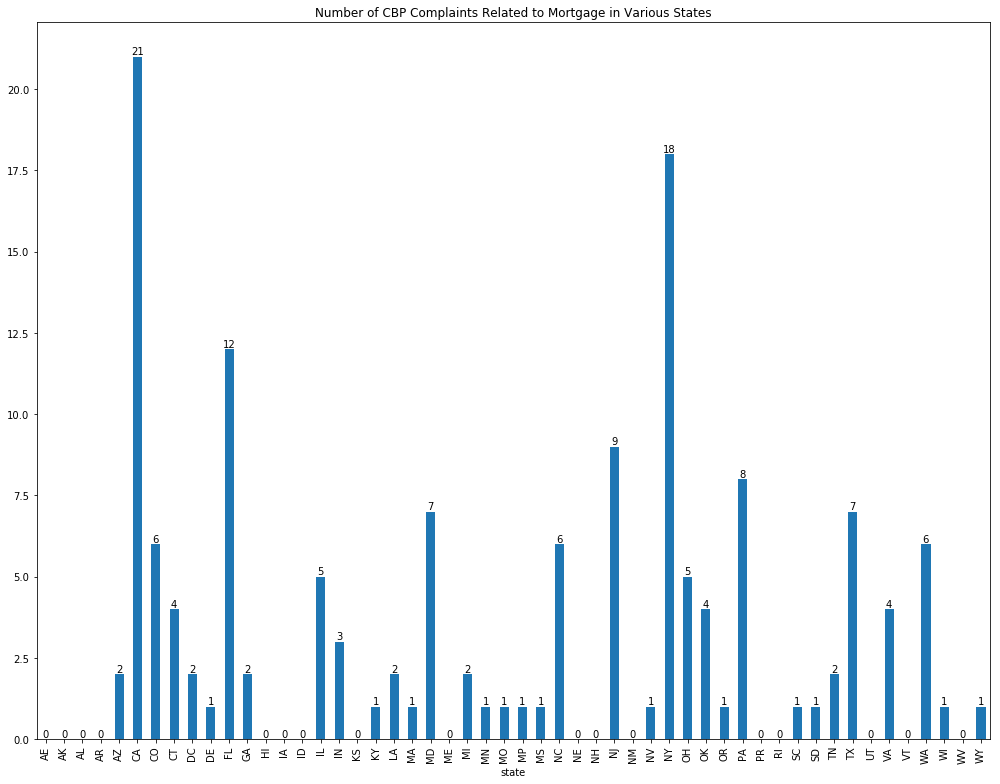

In [48]:
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 14
fig_size[1] = 11
plt.rcParams["figure.figsize"] = fig_size
ax = c.plot.bar()
rects = ax.patches
labels = [c[i] for i in range(len(rects))]
for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2, height, label, ha='center', va='bottom')
ax.set_title("Number of CBP Complaints Related to Mortgage in Various States")
plt.tight_layout()
#savefig('ComplaintsRelatedToMortgageInVariousStates.pdf')

In [49]:
consumerData['date_received'] = pd.to_datetime(consumerData['date_received'])

In [50]:
byYearProductData = consumerData.groupby(consumerData['date_received'].map(lambda x: x.year))['product'].apply(lambda x: x.sum())

In [51]:
byYearProductData

date_received
2012                                  MortgageCredit card
2013                              Bank account or service
2014     Credit cardCredit cardCredit cardDebt collection
2015    Debt collectionDebt collectionDebt collectionC...
2016    Credit reportingDebt collectionBank account or...
2017    Debt collectionDebt collectionMortgageMortgage...
Name: product, dtype: object

In [52]:
d = byYearProductData.str.count("Mortgage")

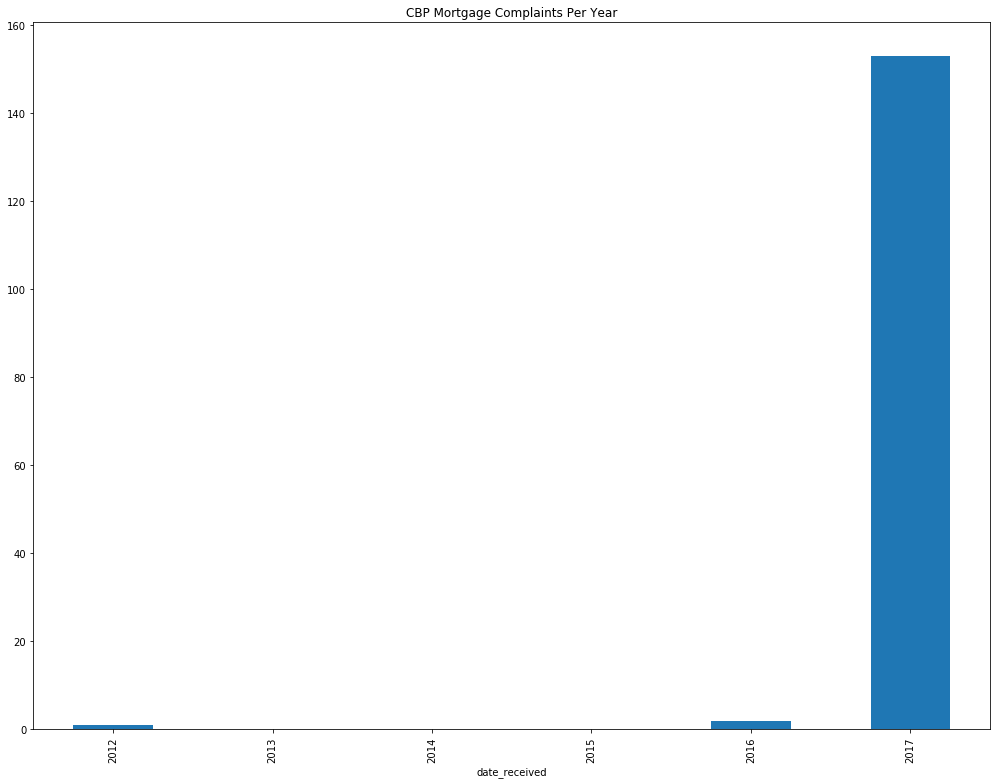

In [53]:
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 14
fig_size[1] = 11
plt.rcParams["figure.figsize"] = fig_size
ax = d.plot.bar()
rects = ax.patches
ax.set_title("CBP Mortgage Complaints Per Year")
plt.tight_layout()
savefig('ComplaintsRelatedToMortgagesPerYear.pdf')

In [54]:
debtCountPerYear = byYearProductData.str.count("Debt collection")

In [55]:
debtCountPerYear

date_received
2012      0
2013      0
2014      1
2015     11
2016     12
2017    206
Name: product, dtype: int64

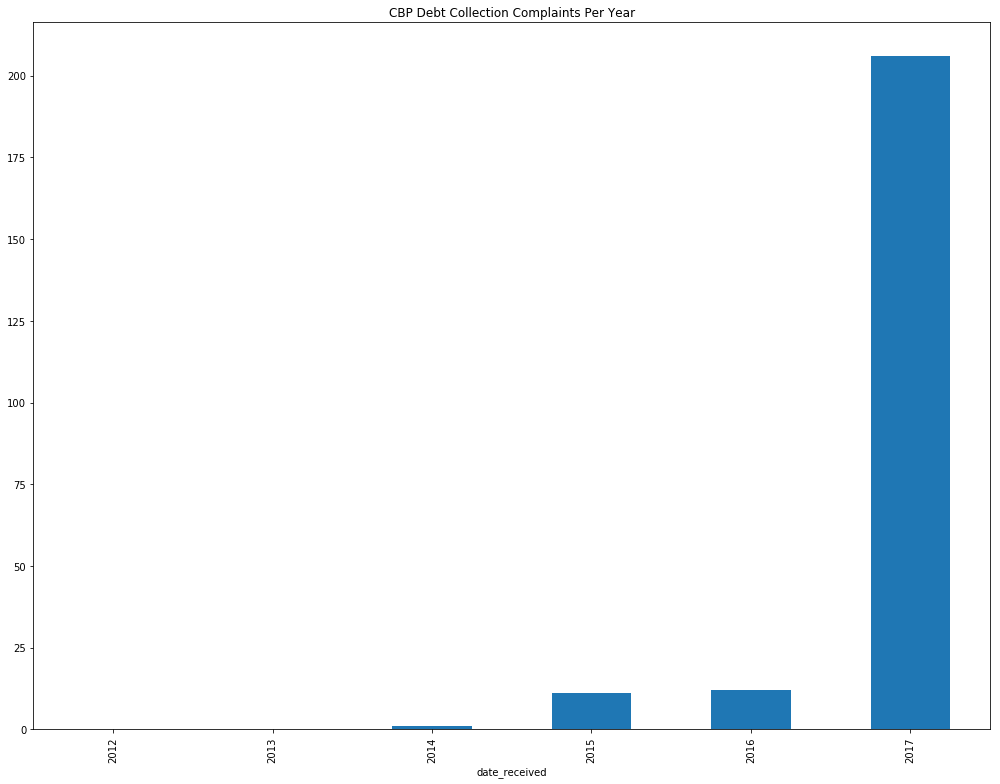

In [56]:
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 14
fig_size[1] = 11
plt.rcParams["figure.figsize"] = fig_size
ax = debtCountPerYear.plot.bar()
rects = ax.patches
ax.set_title("CBP Debt Collection Complaints Per Year")
plt.tight_layout()
savefig('ComplaintsRelatedToDebtCollectionsPerYear.pdf')